In [214]:
# Importando bibliotecas e base de dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



treino = pd.read_csv("treino.csv")
teste = pd.read_csv("teste.csv")

In [215]:
# Explorando banco de dados

treino.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [216]:
treino.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [217]:
# Tratando o banco de dados

# Verificando valores vazios
treino.apply(lambda x: sum(x.isnull()),axis=0) 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [218]:
# Tratando os valores numéricos
# Substituindo valores vazios pela média
    
treino['LoanAmount'].fillna(treino['LoanAmount'].mean(), inplace=True)
treino['Loan_Amount_Term'].fillna(treino['Loan_Amount_Term'].mean(), inplace=True)
treino['Credit_History'].fillna(treino['Credit_History'].mean(), inplace=True)

# Verificando se não há mais campos vazios.
treino.apply(lambda x: sum(x.isnull()),axis=0) 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [219]:
# Tratamento das variáveis object
# Substituindo valores vazios pela moda

from scipy.stats import mode

treino['Gender'].fillna(mode(treino['Gender']).mode[0], inplace=True)
treino['Married'].fillna(mode(treino['Married']).mode[0], inplace=True)
treino['Dependents'].fillna(mode(treino['Dependents']).mode[0], inplace=True)
treino['Self_Employed'].fillna(mode(treino['Self_Employed']).mode[0], inplace=True)

#Transformando variáveis de característica em numérica

from sklearn.preprocessing import LabelEncoder
objects = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in objects:
    treino[i] = le.fit_transform(treino[i])
treino.dtypes 

# Verificando se não há mais campos vazios.
treino.apply(lambda x: sum(x.isnull()),axis=0)
             

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [220]:
# Distribuição dos status do empréstimo em valor absoluto
display(treino["Loan_Status"].value_counts())

# Distribuição dos status do empréstimo em valor relativo
display(treino["Loan_Status"].value_counts(normalize=True))

# Distribuição dos status do empréstimo em valor percentual
display(treino["Loan_Status"].value_counts(normalize=True).map("{:.2%}".format))

1    422
0    192
Name: Loan_Status, dtype: int64

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

1    68.73%
0    31.27%
Name: Loan_Status, dtype: object

In [221]:
# Importando biblioteca plotly
import plotly.express as px

# Criando histograma de todas as variáveis em função do Loan Status
for coluna in treino:
    if coluna != "Loan_ID":
        valor = treino.pivot_table(index="Loan_Status", columns=coluna, aggfunc="count")["Loan_ID"]
        display(valor)
    
        histograma = px.histogram(treino, x=coluna, color="Loan_Status")
        histograma.show()
        

Gender,0,1
Loan_Status,,
0,37,155
1,75,347


Married,0,1
Loan_Status,,
0,79,113
1,134,288


Dependents,0,1,2,3
Loan_Status,,,,
0,113,36,25,18
1,247,66,76,33


Education,0,1
Loan_Status,,
0,140,52
1,340,82


Self_Employed,0,1
Loan_Status,,
0,166,26
1,366,56


ApplicantIncome,150,210,416,645,674,1000,1025,1299,1378,1442,...,20667,20833,23803,33846,37719,39147,39999,51763,63337,81000
Loan_Status,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,1.0,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN


CoapplicantIncome,0.000000,16.120001,189.000000,240.000000,242.000000,461.000000,484.000000,505.000000,536.000000,663.000000,...,7750.000000,7873.000000,8106.000000,8333.000000,8980.000000,10968.000000,11300.000000,20000.000000,33837.000000,41667.000000
Loan_Status,,,,,,,,,,,,,,,,,,,,,
0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
1,177.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN


LoanAmount,9.0,17.0,25.0,26.0,30.0,35.0,36.0,40.0,42.0,44.0,...,436.0,480.0,490.0,495.0,496.0,500.0,570.0,600.0,650.0,700.0
Loan_Status,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
1,NaN,1.0,2.0,1.0,2.0,NaN,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0


Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,342.0,360.0,480.0
Loan_Status,,,,,,,,,,,
0,NaN,2.0,NaN,1.0,NaN,15.0,1.0,5.0,6.0,153.0,9.0
1,1.0,NaN,2.0,3.0,3.0,29.0,3.0,8.0,8.0,359.0,6.0


Credit_History,0.000000,0.842199,1.000000
Loan_Status,,,
0,82,13,97
1,7,37,378


Property_Area,0,1,2
Loan_Status,,,
0,69,54,69
1,110,179,133


Loan_Status,0,1
Loan_Status,,
0,192.0,NaN
1,NaN,422.0


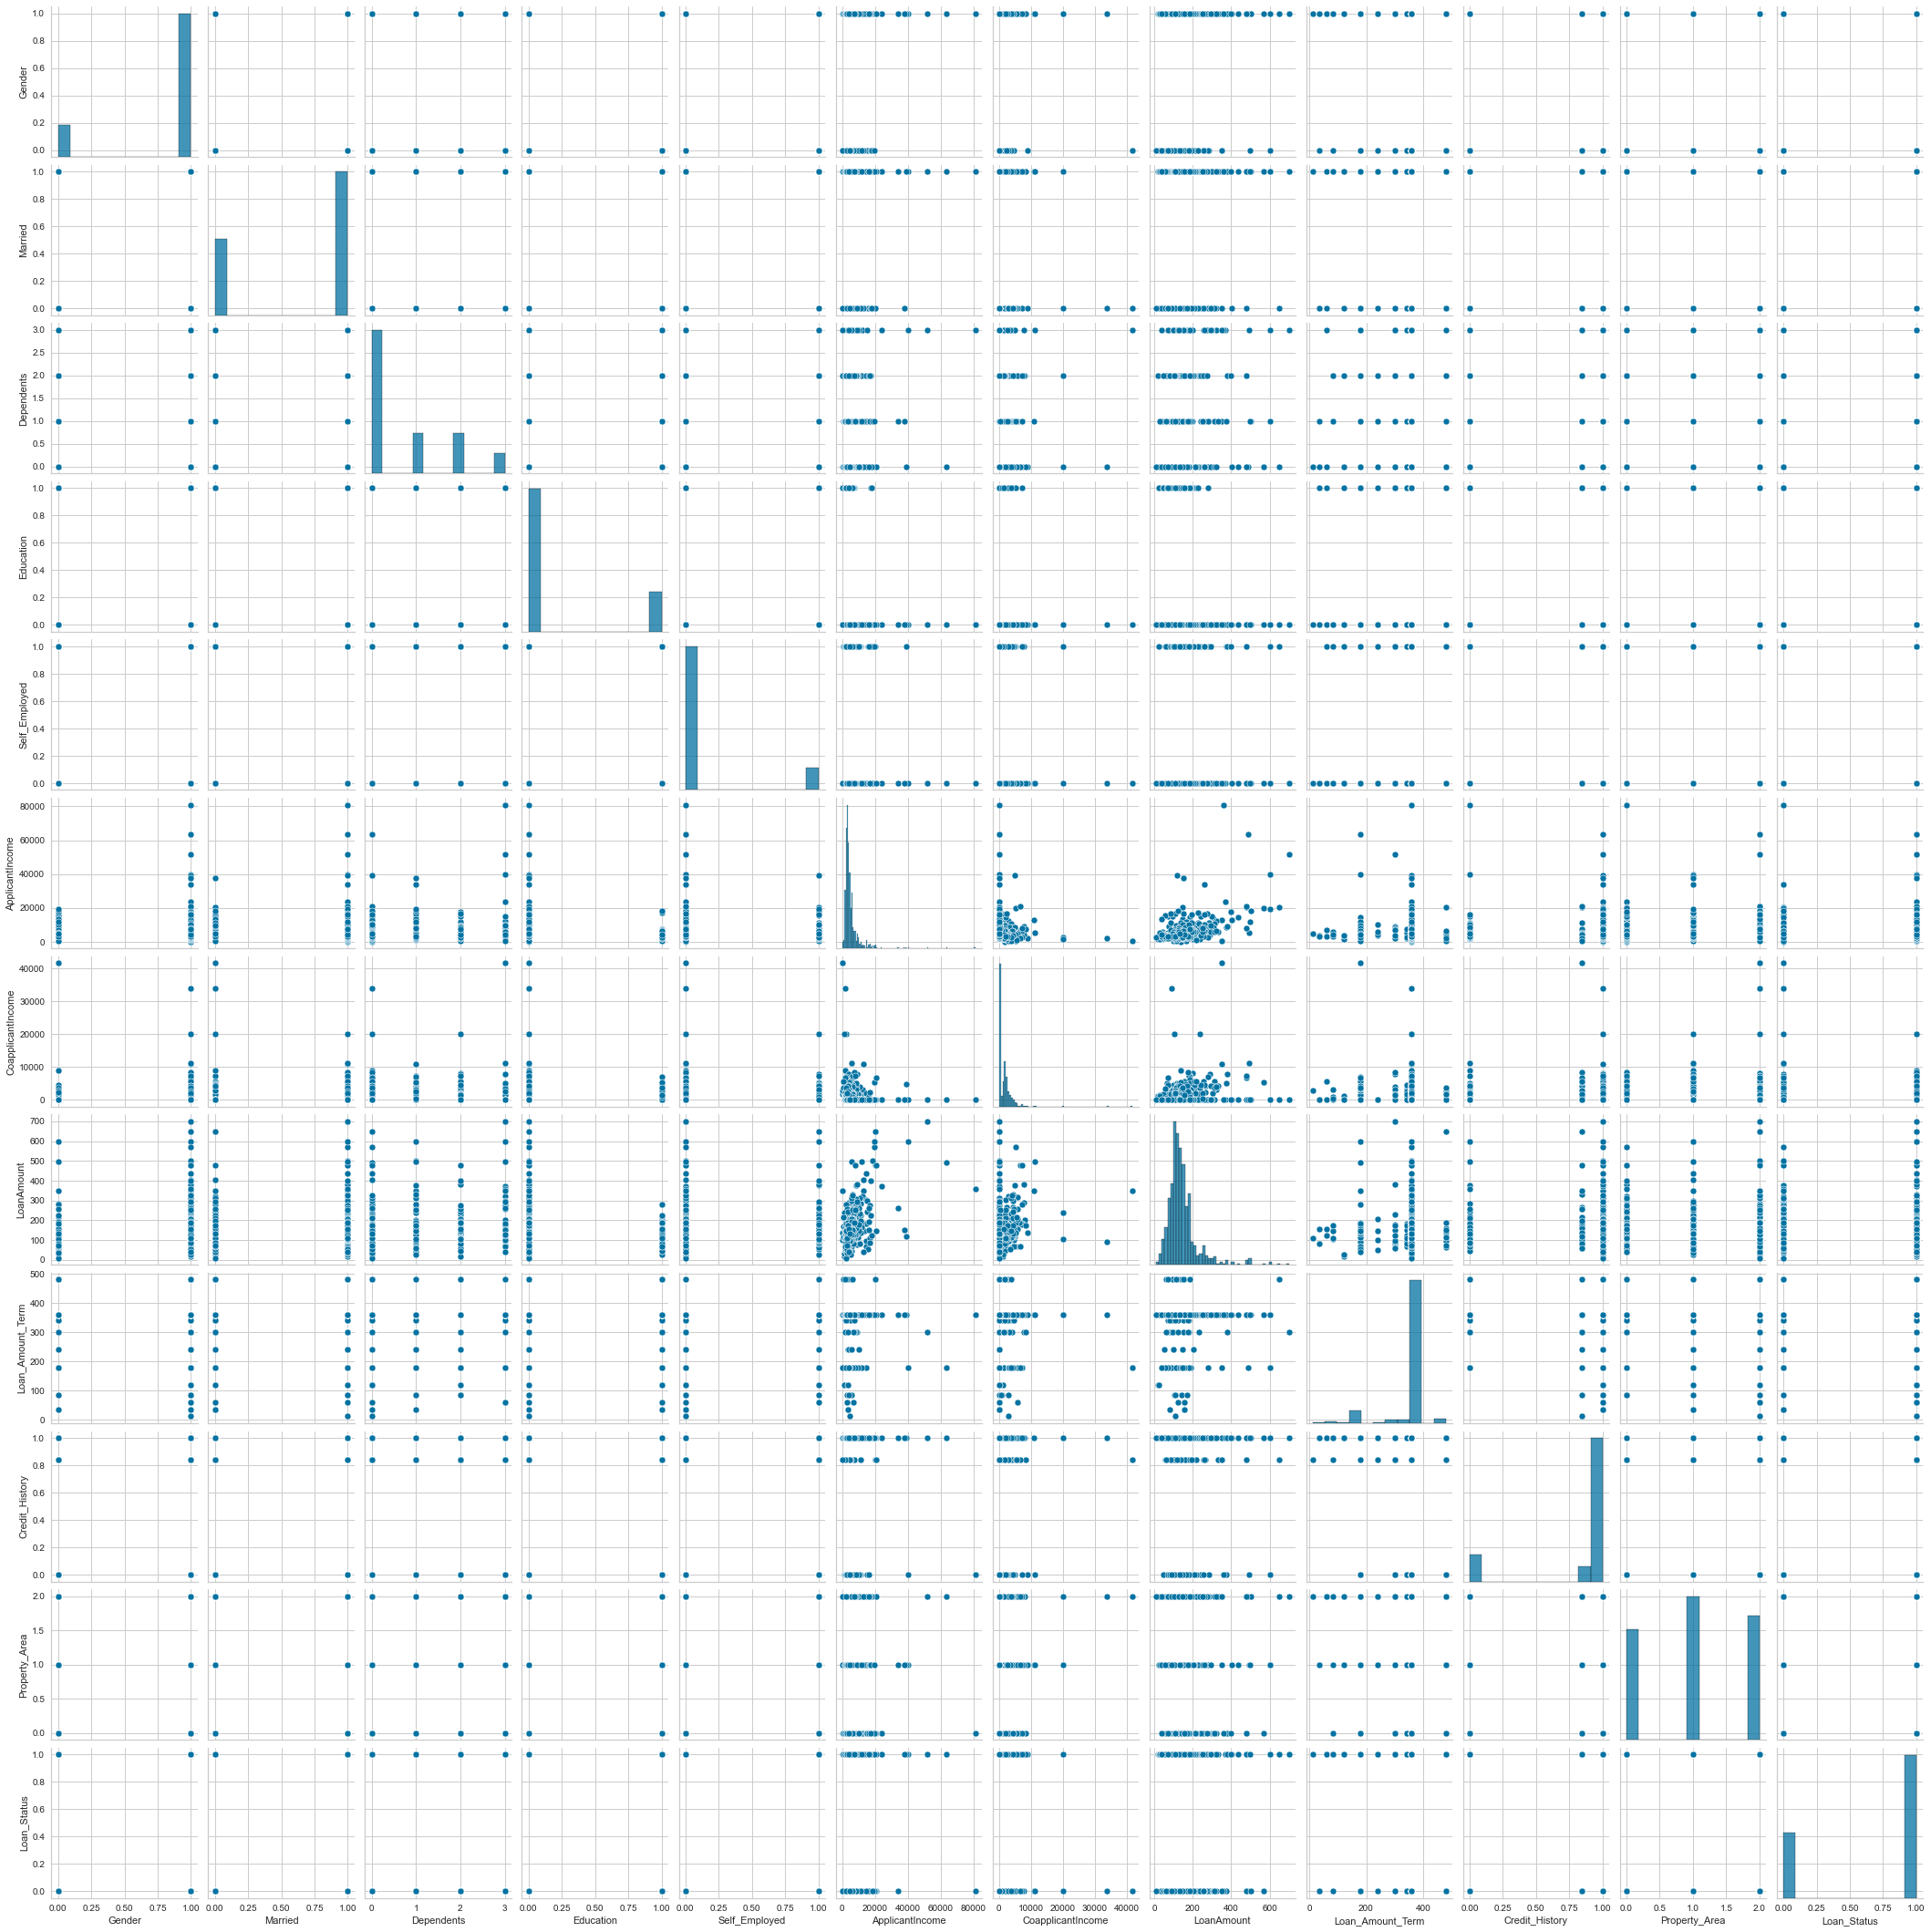

In [222]:
#Gráfico de correlação
sns.pairplot(treino)
plt.show()


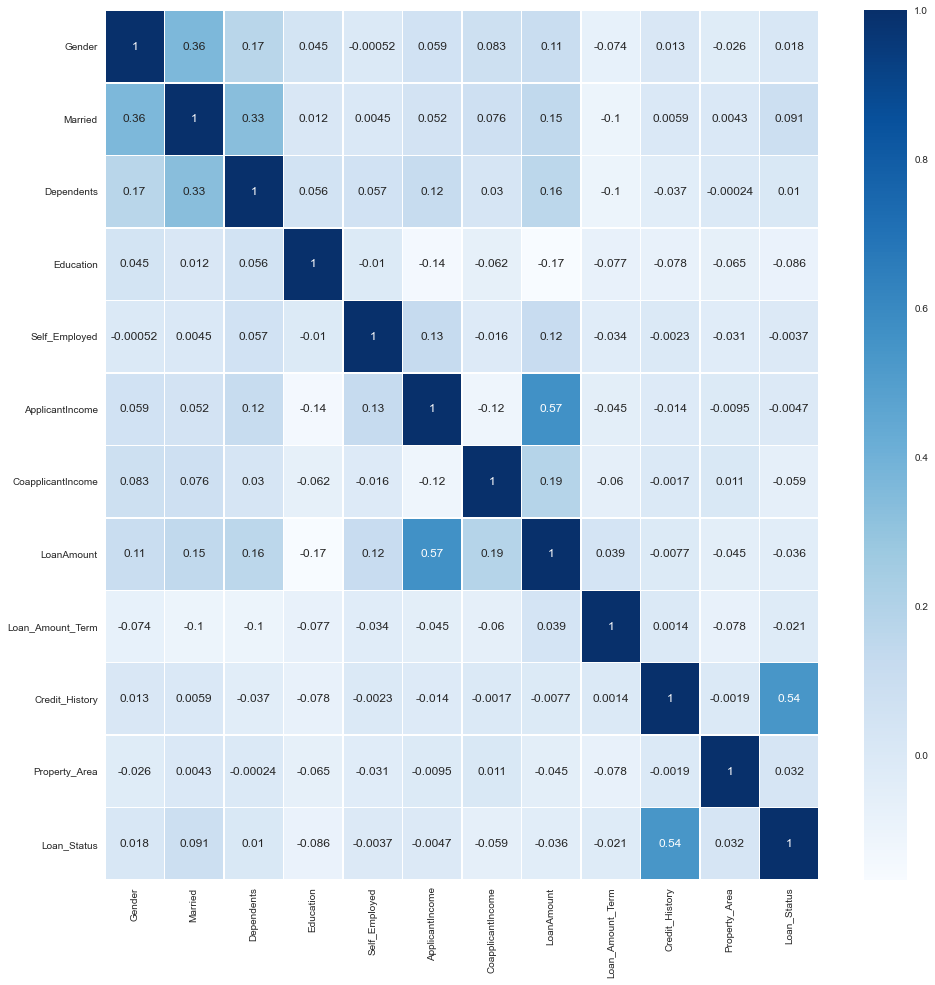

In [223]:
# Mapa de calor
plt.figure(figsize=(16, 16))
sns.heatmap(treino.corr(), linewidths=.5, cmap="Blues", annot=True)
plt.show()

Apenas o histórico de crédito tem alguma relação com a aprovação do empréstimo(0.54).
Pela correlação, pode-se observar que o valor do empréstimo tem relação com a renda do aplicante, correlação de 0,57.

Eu escolheria histórico de credito, valor do emprestimo e renda do aplicante.

In [224]:
# Dividindo base de teste e treino

from sklearn.model_selection import train_test_split  
treino , teste = train_test_split(treino,test_size=0.2,random_state=0)

x_treino = treino.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y_treino = treino['Loan_Status']

x_teste = teste.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y_teste = teste['Loan_Status']

Algoritmos que serão utilizados nos modelos

Logistic Regression (LR) Linear Discriminant Analysis (LDA) K-Nearest Neighbors (KNN). Classification and Regression Trees (CART). Gaussian Naive Bayes (NB). Support Vector Machines (SVM).

Algoritmos simples lineares (LR e LDA)

Algoritmos não lineares (KNN, CART, NB e SVM)

In [225]:
# Importando bibliotecas e avaliando o melhor modelo

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

modelos = []
modelos.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('RFC', RandomForestClassifier()))


resultados = []
nomes = []
for nome, modelo in modelos:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    resultado_cruzado = cross_val_score(modelo, x_treino, y_treino, cv=kfold, scoring='accuracy')
    resultados.append(resultado_cruzado)
    nomes.append(nome)
 
    print('%s: %f (%f)' % (nome, resultado_cruzado.mean(), resultado_cruzado.std()))



LR: 0.800367 (0.042768)
DTC: 0.700531 (0.065511)
RFC: 0.775837 (0.062231)


Pelos resultados, o LR é o melhor modelo, logo iremos usar a regressão logística.

In [226]:
#Criando o modelo e vendo seus resultados

modelo = LogisticRegression(solver='liblinear', multi_class='ovr')
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)

print(accuracy_score(y_teste, predicao))
print(confusion_matrix(y_teste, predicao))
print(classification_report(y_teste, predicao))

0.8373983739837398
[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



O modelo está com 76% de acurácia.